Using a dataset of your choice: 
1. Select an outcome variable 
    * price
2. Pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. 
    * Categorical: type, region
    * Continuous: bedrooms, bathrooms, building area, car spots
3. Explore the variables using the univariate and bivariate methods you've learned so far.
4. Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.
5. Finally, use filtering methods to select the five best features and justify your choices.

    * [Melbourne Housing Datatset](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [185]:
# Importing data
housing = pd.read_csv('Melbourne_housing_FULL.csv')

# Cleaning Data

In [186]:
# Selecting relevant variables
housing = housing[['Type', 'Regionname', 'Bedroom2', 'Bathroom', 'Car','BuildingArea', 'Price']]
# Renaming columns
housing.columns = ['type', "region_name", 'bedrooms', 'bathrooms', 'car_spots', 'building_area', 'price']

# Removing nulls and missing data
housing = housing.dropna()

housing['bedrooms'] = pd.to_numeric(housing['bedrooms'])

In [195]:
# Importing data
housing = pd.read_csv('Melbourne_housing_FULL.csv')

# Selecting relevant variables
housing = housing[['Type', 'Regionname', 'Bedroom2', 'Bathroom', 'Car','BuildingArea', 'Price']]
# Renaming columns
housing.columns = ['type', "region_name", 'bedrooms', 'bathrooms', 'car_spots', 'building_area', 'price']

# Removing nulls and missing data
housing = housing.dropna()

housing['bedrooms'] = pd.to_numeric(housing['bedrooms'])

# Removing outliers
def within_x_std(col,x):
    mean = housing[col].mean()
    x_std = housing[col].std()*x
    upper_bound = mean + x_std
    lower_bound = mean - x_std
    return [upper_bound,lower_bound]

bedroom_bounds = within_x_std("bedrooms",3)
bathroom_bounds = within_x_std("bathrooms",3)
car_spots_bounds = within_x_std("car_spots",3)
building_area_bounds = within_x_std("building_area",3)
price_bounds = within_x_std("price",3)

housing = housing[(housing['bedrooms'] <= bedroom_bounds[0]) & (housing['bedrooms'] >= bedroom_bounds[1])]
housing = housing[(housing['bathrooms'] <= bathroom_bounds[0]) & (housing['bathrooms'] >= bathroom_bounds[1])]
housing = housing[(housing['car_spots'] <= car_spots_bounds[0]) & (housing['car_spots'] >= car_spots_bounds[1])]
housing = housing[(housing['building_area'] <= building_area_bounds[0]) & (housing['building_area'] >= building_area_bounds[1])]
housing = housing[(housing['price'] <= price_bounds[0]) & (housing['price'] >= price_bounds[1])]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10012 entries, 2 to 34856
Data columns (total 7 columns):
type             10012 non-null object
region_name      10012 non-null object
bedrooms         10012 non-null float64
bathrooms        10012 non-null float64
car_spots        10012 non-null float64
building_area    10012 non-null float64
price            10012 non-null float64
dtypes: float64(5), object(2)
memory usage: 625.8+ KB
None


# Univariate Exploration

In [198]:
#print(housing.head())
print(housing.head())

housing.info()

   type            region_name  bedrooms  bathrooms  car_spots  building_area  \
2     h  Northern Metropolitan       2.0        1.0        0.0           79.0   
4     h  Northern Metropolitan       3.0        2.0        0.0          150.0   
6     h  Northern Metropolitan       3.0        1.0        2.0          142.0   
11    h  Northern Metropolitan       4.0        2.0        0.0          210.0   
14    h  Northern Metropolitan       2.0        1.0        2.0          107.0   

        price  
2   1035000.0  
4   1465000.0  
6   1600000.0  
11  1876000.0  
14  1636000.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10012 entries, 2 to 34856
Data columns (total 7 columns):
type             10012 non-null object
region_name      10012 non-null object
bedrooms         10012 non-null float64
bathrooms        10012 non-null float64
car_spots        10012 non-null float64
building_area    10012 non-null float64
price            10012 non-null float64
dtypes: float64(5), object(2)
m

Brief description the variables:
* type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* region_name: General Region (West, North West, North, North east ...etc)
* bedrooms: Scraped # of Bedrooms (from different source)
* bathrooms: Number of Bathrooms
* car_spots: Number of carspots
* building_area: Building Size in Metres
* price: Price in Australian dollars


There's 10479 entries in this dataset!

# Multivariate exploration

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


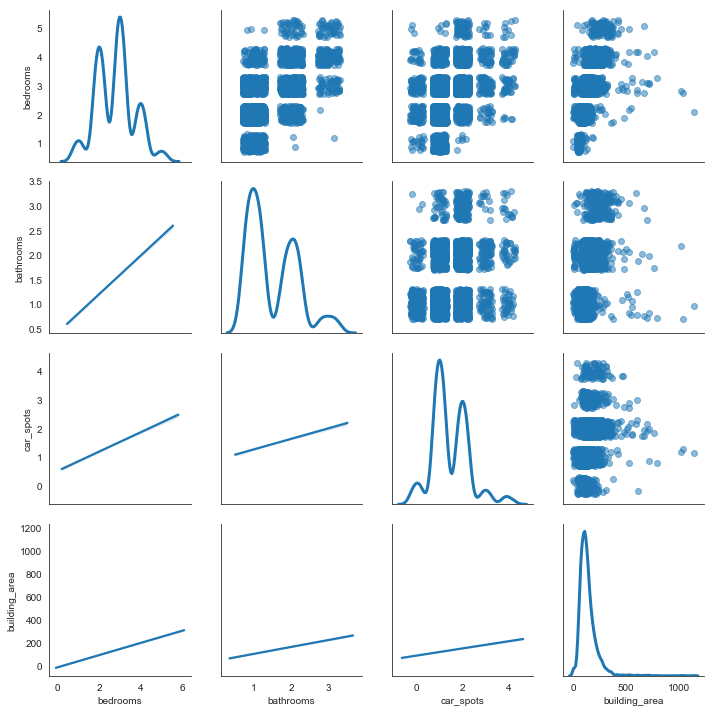

In [199]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
housing_sel = housing[['type', 'bedrooms', 'bathrooms', 'car_spots', 'building_area',"price"]]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
housing_jittered = housing_sel.loc[:, 'bedrooms':'building_area'].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(housing_jittered.shape)),
    columns=housing_jittered.columns
)

# Combine the data and the noise.
housing_jittered = housing_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(housing_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

               bedrooms  bathrooms  car_spots  building_area     price
bedrooms       1.000000   0.593395   0.416790       0.585750  0.449402
bathrooms      0.593395   1.000000   0.314471       0.519297  0.396976
car_spots      0.416790   0.314471   1.000000       0.310709  0.175592
building_area  0.585750   0.519297   0.310709       1.000000  0.444558
price          0.449402   0.396976   0.175592       0.444558  1.000000


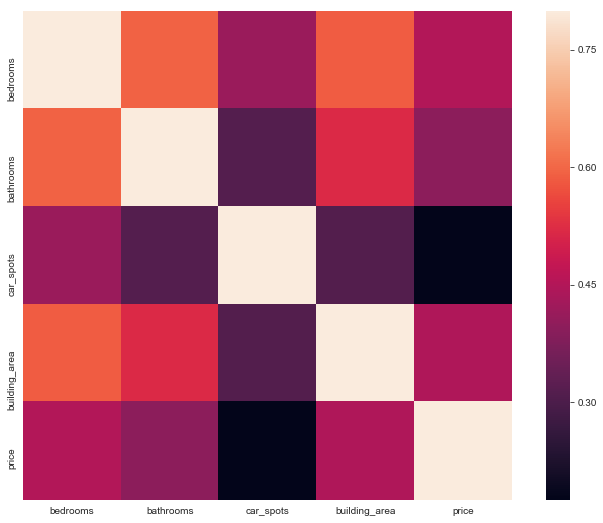

In [200]:
corrmat = housing.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

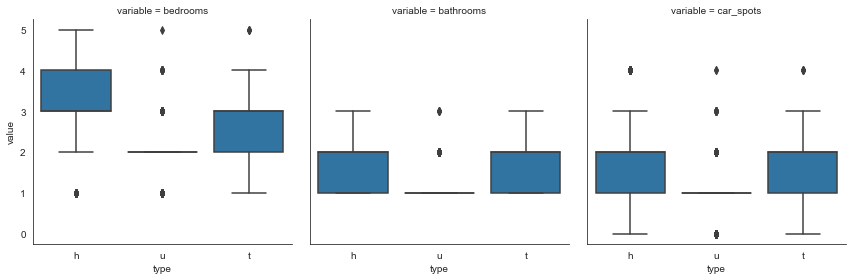

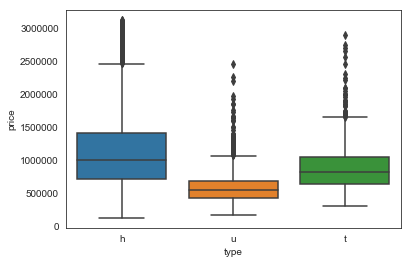

        value                                             
        count      mean       std  min  25%  50%  75%  max
type                                                      
h     21966.0  2.251115  1.074779  0.0  1.0  2.0  3.0  5.0
t      2724.0  2.083700  0.832439  0.0  2.0  2.0  3.0  5.0
u      5346.0  1.429293  0.634784  0.0  1.0  1.0  2.0  5.0


In [219]:
# Restructure the data so we can use FacetGrid rather than making a boxplot for each variable separately.
housing_sel2 = housing_sel[['type', 'bedrooms', 'bathrooms', 'car_spots']]
housing_long = pd.melt(frame= housing_sel2, id_vars= ['type'], )

plt.figure(figsize= (10,10))
g = sns.FacetGrid(housing_long, col="variable", height=4)
g = g.map(sns.boxplot, "type", "value")
plt.show()

sns.boxplot(x=housing['type'],y=housing_sel['price'])
plt.show()

# Descriptive statistics by group.
print(housing_long.groupby('type').describe())


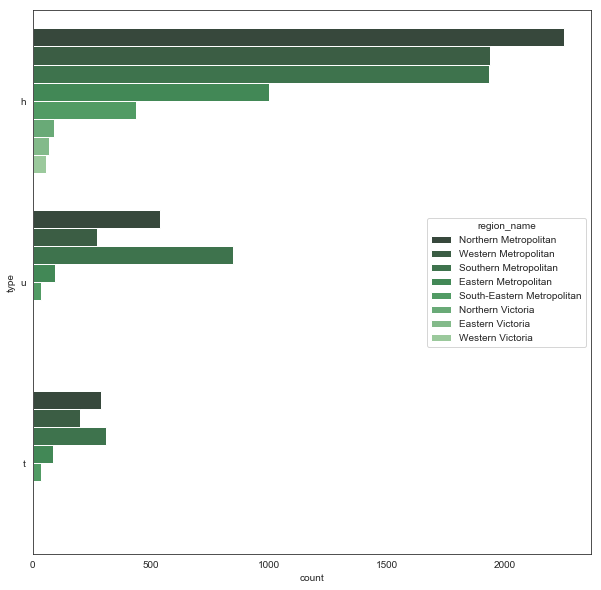

region_name  Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  \
type                                                                         
h                            1001                69                   2251   
t                              86                 1                    288   
u                              95                 1                    537   

region_name  Northern Victoria  South-Eastern Metropolitan  \
type                                                         
h                           90                         436   
t                            0                          35   
u                            1                          35   

region_name  Southern Metropolitan  Western Metropolitan  Western Victoria  
type                                                                        
h                             1932                  1938                57  
t                              310                   198           

In [60]:
# Add a second categorical variable.
housing_sel3 = housing[['type','region_name']]
#housing_sel2.Regionname.unique()

# Plot counts for each combination of levels.
plt.figure(figsize=(10,10))
sns.countplot(y="type", hue="region_name", data=housing_sel3, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(housing_sel3['type'], housing_sel3['region_name'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

# Feature Engineering

In [242]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(housing)
#print(features.head())

# extra_rooms feature
features['total_rooms'] = housing['bedrooms'] + housing['bathrooms']

# bed + bath + car feature
features['bed_bath_car_sum'] = housing['bedrooms'] + housing['bathrooms'] + housing['car_spots']

# bed/bath ratio feature
features['bed_bath_ratio'] = housing['bedrooms'] / housing['bathrooms']

# bed/car ratio feature
features['bed_car_ratio'] = housing['bedrooms'] / (housing['car_spots'] + 0.01)

# bath/car ratio feature
features['bath_car_ratio'] = housing['bathrooms'] / (housing['car_spots'] + 0.01)

# bed * bath feature
features['bed_bath_prod'] = housing['bedrooms'] * housing['bathrooms']

# bed * car feature
features['bed_car_prod'] = housing['bedrooms'] * housing['car_spots']

# bath * car feature
features['bath_car_prod'] = housing['bathrooms'] * housing['car_spots']

# bed * bath * car_spots feature
features['bed_bath_car_prod'] = housing['bedrooms'] * housing['bathrooms'] + housing['car_spots']

# building_area / (bed * bath + car) feature
features['building_div'] = housing['building_area'] / (housing['bedrooms'] * housing['bathrooms'] + housing['car_spots'])


In [240]:
# filter method for variance
    
vars = np.array([np.var(features['total_rooms']), np.var(features['bed_bath_car_sum']),
                np.var(features['bed_bath_ratio']), np.var(features['bed_car_ratio']),
                np.var(features['bath_car_ratio']), np.var(features['bed_bath_prod']),
                np.var(features['bed_car_prod']), np.var(features['bath_car_prod']),
                np.var(features['bed_bath_car_prod']), np.var(features['building_div'])])

features_var = pd.DataFrame(vars, columns=['variance'], 
                            index=['total_rooms', 'bed_bath_car_sum', 'bed_bath_ratio', 'bed_car_ratio',
                            'bath_car_ratio', 'bed_bath_prod', 'bed_car_prod', 'bath_car_prod',
                            'bed_bath_car_prod', 'building_div'])

print(features_var.sort_values(by='variance').head(5))

                   variance
bed_bath_ratio     0.502844
total_rooms        1.875619
bed_bath_car_sum   3.528231
bath_car_prod      4.034072
bed_bath_prod     10.005320


For feature selection, we order the varaince of the features in ascending order. Sorted this way, the top five are the five we ought to select for modeling.